In [2]:
## Import Basic Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [332]:
## Pull the Training Data
data = pd.read_excel('Data_Train.xlsx')

In [333]:
data.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [334]:
### 13 Features and 6019 Data Set
data.shape

(6019, 13)

In [335]:
## Checking for the null values
data.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [336]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [337]:
data['Engine'].isnull().T.any().T.sum()

1

In [338]:
data1 = data.copy()

In [339]:
data.shape

(6019, 13)

In [340]:
data1.shape

(6019, 13)

In [341]:
data['Engine'].dropna(how=any,inplace=True)

In [46]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [342]:
### Deleting the NaN Values from Features Engine, Power.
data.dropna(subset=['Engine'],inplace=True)
## Dropping the nan for Mileage and Seats Features
data.dropna(subset=['Mileage'],inplace=True)
data.dropna(subset=['Seats'],inplace=True)

In [343]:
data.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5152
Price                   0
dtype: int64

In [344]:
## Dropping the column
##data['New_Price'].drop(inplace=True)
data.drop(['New_Price'],axis=1,inplace=True)

In [345]:
### Now the Data is Clean 
data.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [346]:
data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50


#### Exploratory Data Analysis

#### FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs.

In [347]:
data['Name'].nunique()

1855

In [348]:
data['Location'].nunique()

11

In [349]:
data['Name'].value_counts()

Mahindra XUV500 W8 2WD                              49
Maruti Swift VDI                                    45
Maruti Swift Dzire VDI                              34
Honda City 1.5 S MT                                 34
Maruti Swift VDI BSIV                               31
Hyundai i10 Sportz                                  30
Maruti Ritz VDi                                     30
Toyota Fortuner 3.0 Diesel                          29
Hyundai Grand i10 Sportz                            27
Honda Amaze S i-Dtech                               27
Maruti Ertiga VDI                                   25
Honda Brio S MT                                     25
Honda City 1.5 V MT                                 24
Hyundai Verna 1.6 SX                                23
Maruti Wagon R VXI                                  23
Maruti Wagon R LXI                                  22
Maruti Alto LXi                                     21
Skoda Superb Elegance 1.8 TSI AT                    20
Maruti Alt

In [350]:
print('Location of CARS \n ',data['Location'].value_counts())
print('-----------------------------\n')
print('CARs Manufacture Year \n ',data['Year'].value_counts())
print('-----------------------------\n')
print('Fuel Engines \n ',data['Fuel_Type'].value_counts())
print('-----------------------------')
print('\nTransmission Manual And Auto\n',data['Transmission'].value_counts())
print('-----------------------------')
print('Onwership of the CARS \n', data['Owner_Type'].value_counts())


Location of CARS 
  Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: Location, dtype: int64
-----------------------------

CARs Manufacture Year 
  2014    795
2015    741
2016    740
2013    648
2017    586
2012    572
2011    461
2010    339
2018    298
2009    196
2008    169
2007    123
2019    102
2006     75
2005     55
2004     29
2003     15
2002     14
2001      7
1998      4
2000      4
1999      2
Name: Year, dtype: int64
-----------------------------

Fuel Engines 
  Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64
-----------------------------

Transmission Manual And Auto
 Manual       4266
Automatic    1709
Name: Transmission, dtype: int64
-----------------------------
Onwership of the CARS 
 First             4903
Second             953
Third              111
Fourth & Above    

In [351]:
##('CAR Mileage  \n ',data['Mileage'].value_counts())
##print('-----------------------------\n')
##print('CAR Engine \n ',data['Engine'].value_counts())
##print('-----------------------------\n')
##print('CAR Horse Power \n ',data['Power'].value_counts())
##print('-----------------------------')
print('CARs Seats \n',data['Seats'].value_counts())
print('-----------------------------')

CARs Seats 
 5.0     5012
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64
-----------------------------


In [352]:
data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50


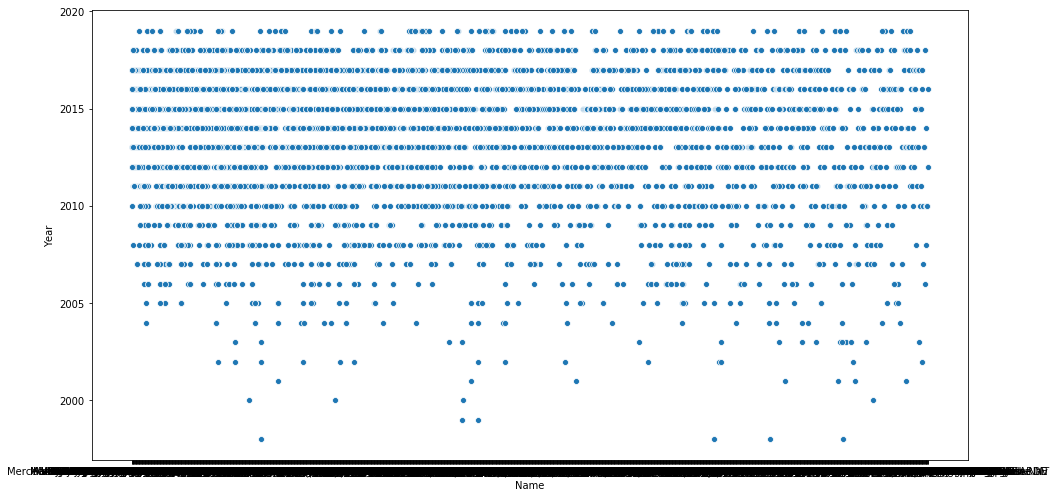

In [353]:
## In the Data set ,most of the vehicles manufacturing is between 2005 and 2020
import seaborn as sb
sb.scatterplot(data['Name'],data['Year'])

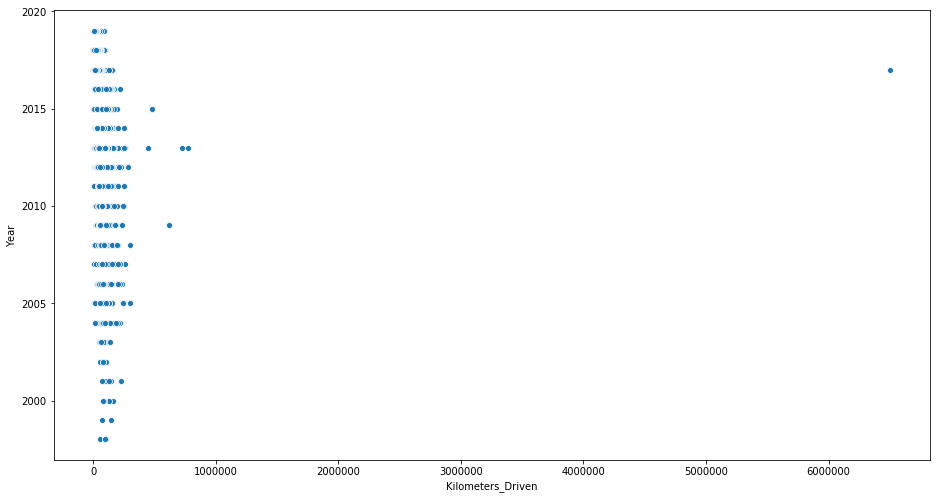

In [354]:
import seaborn as sb
sb.scatterplot(data['Kilometers_Driven'],data['Year'])

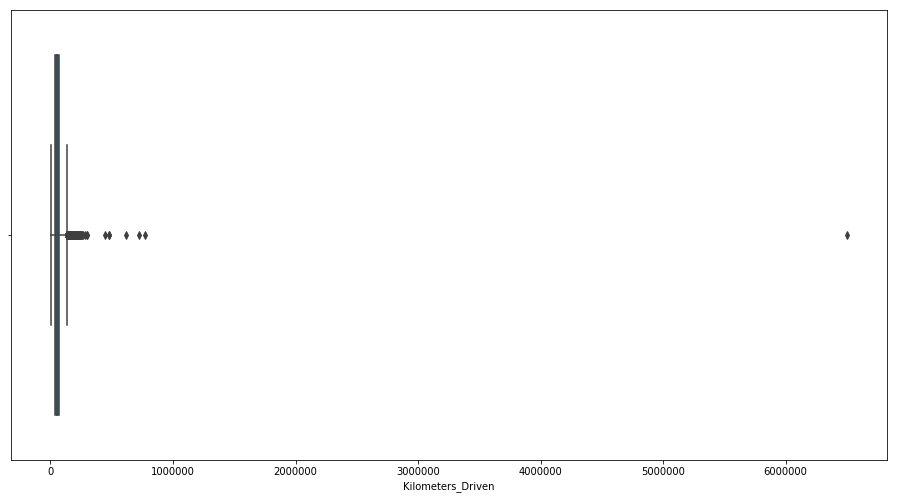

In [356]:
sb.boxplot(data['Kilometers_Driven'])

In [357]:
data['Kilometers_Driven'].max()

6500000

In [358]:
data['Kilometers_Driven'].min()

171

In [359]:
### Detecting the outlier by Z-Score Method

In [360]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=6
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [361]:
### We got the outlier 
outlier_datapoints = detect_outlier(data['Kilometers_Driven'])
print(outlier_datapoints)

[775000, 620000, 720000, 6500000]


In [362]:
## Z score method

In [363]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data['Kilometers_Driven']))
print(z)

[0.14555501 0.19305462 0.13844016 ... 0.04013414 0.13844016 0.12751727]


In [364]:
threshold = 3
print(np.where(z > 3))

(array([ 337,  355, 1851, 2314, 2801, 3069, 4457], dtype=int64),)


In [365]:
z[337]

7.824347534642766

In [366]:
data[data['Kilometers_Driven'] == 6500000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,65.0


In [367]:
###Droppe the outlier
data.drop(2328,inplace=True)

In [368]:
##Verified the outlier deletion
data[data['Kilometers_Driven'] == 6500000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


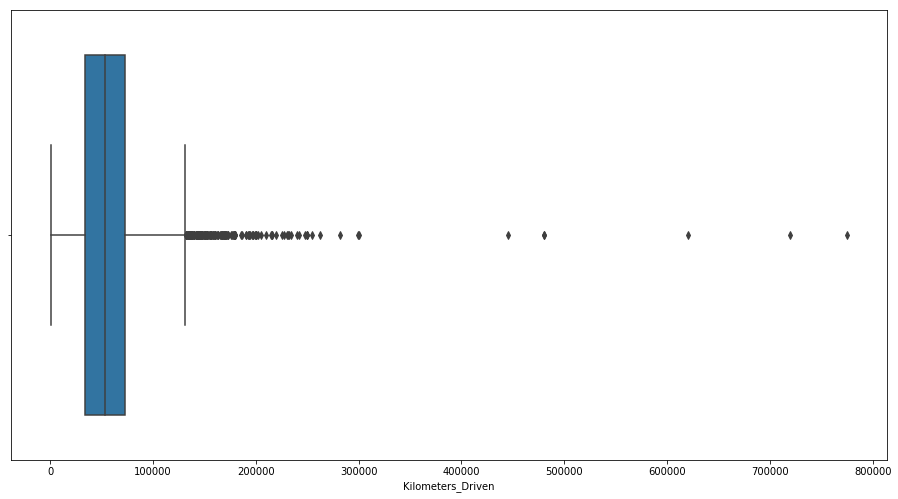

In [369]:
sb.boxplot(data['Kilometers_Driven'])

In [370]:
data[data['Kilometers_Driven'] == 775000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,7.5


In [371]:
data[data['Kilometers_Driven'] == 720000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.9


In [372]:
data[data['Kilometers_Driven'] == 620000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.7


In [373]:
data.drop(340,inplace=True)
data.drop(1860,inplace=True)
data.drop(358,inplace=True)

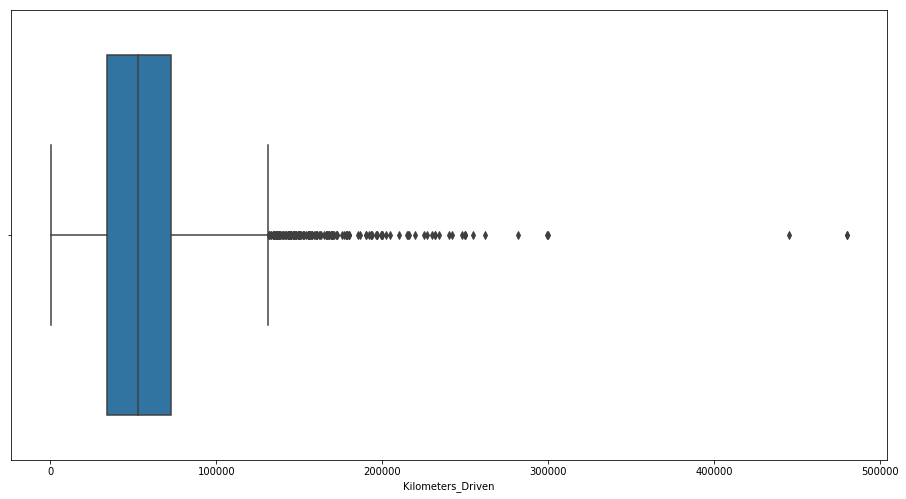

In [374]:
sb.boxplot(data['Kilometers_Driven'])

In [375]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=6
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [376]:
### We got the outlier 
outlier_datapoints = detect_outlier(data['Kilometers_Driven'])
print(outlier_datapoints)

[299322, 282000, 480000, 480000, 300000, 445000]


In [377]:
##print(data[data['Kilometers_Driven'] == 480000])
##print(data[data['Kilometers_Driven'] == 445000])

In [378]:
data[data['Kilometers_Driven'] == 480000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96 kmpl,1968 CC,138.03 bhp,5.0,13.0
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.4 kmpl,1497 CC,117.3 bhp,5.0,5.0


In [379]:
data[data['Kilometers_Driven'] == 445000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,4.45


In [380]:
### Deleting few more outliers which are identified
data.drop(2823,inplace=True)
data.drop(3092,inplace=True)
data.drop(4491,inplace=True)

### Now the outliers have been removed from the data set

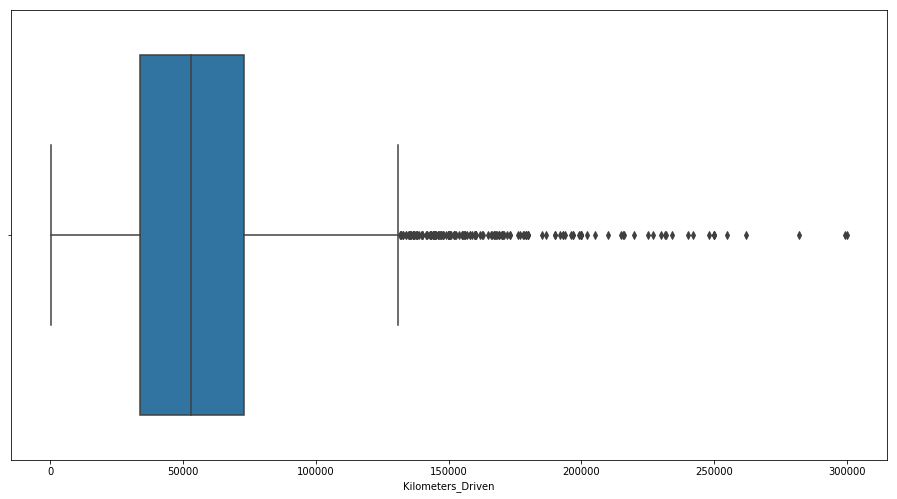

In [381]:
sb.boxplot(data['Kilometers_Driven'])

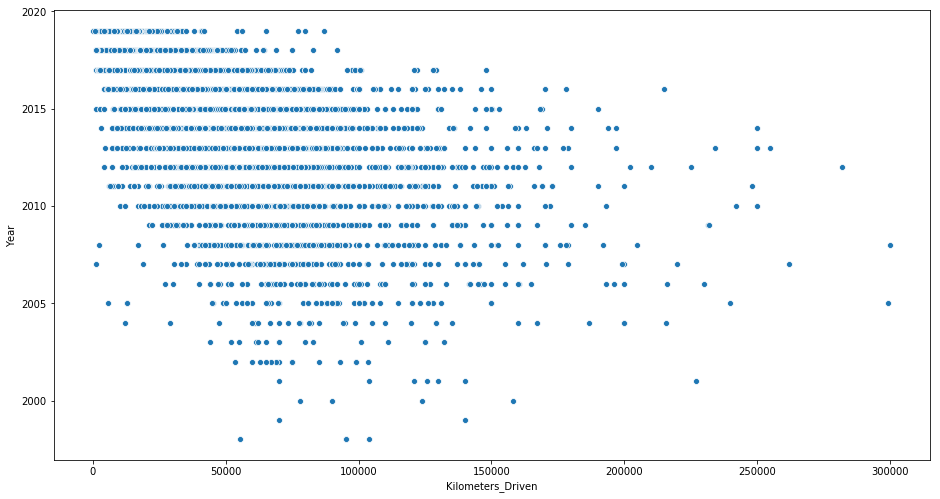

In [382]:
sb.scatterplot(data['Kilometers_Driven'],data['Year'])

In [383]:
data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50


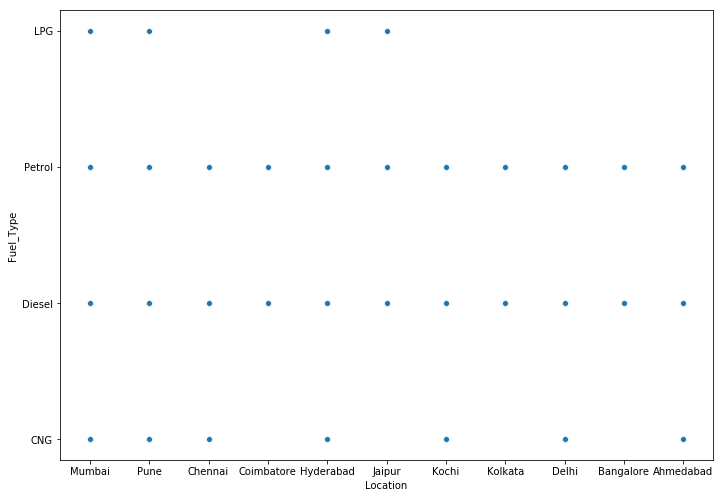

In [384]:
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sb.scatterplot(data['Location'],data['Fuel_Type'])

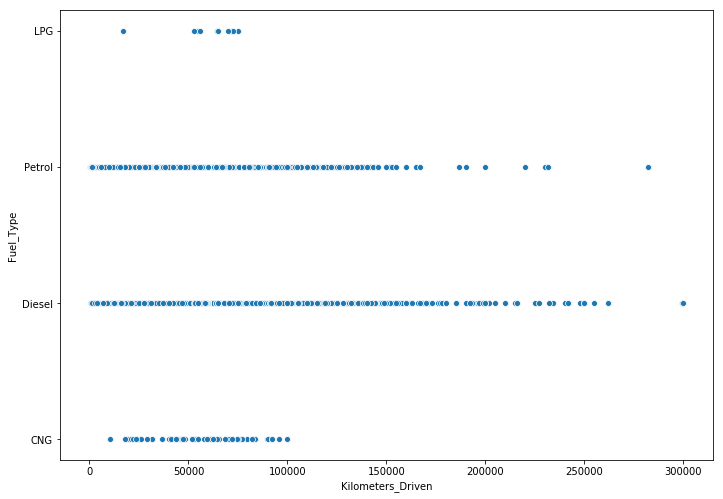

In [251]:
sb.scatterplot(data['Kilometers_Driven'],data['Fuel_Type'])

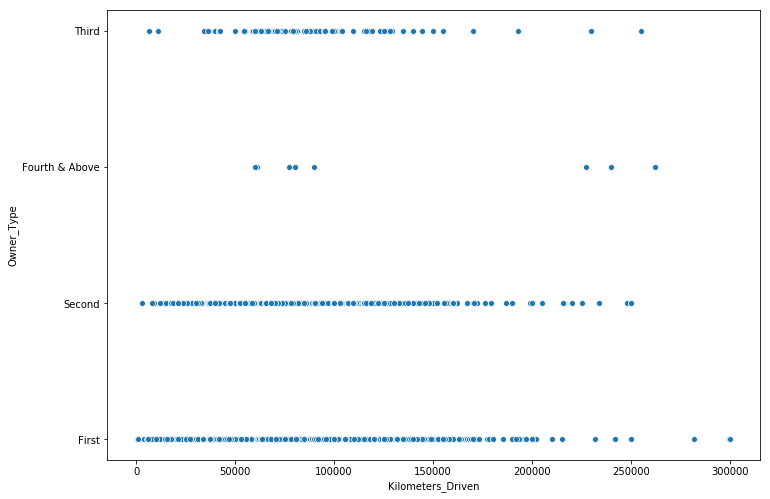

In [385]:
sb.scatterplot(data['Kilometers_Driven'],data['Owner_Type'])

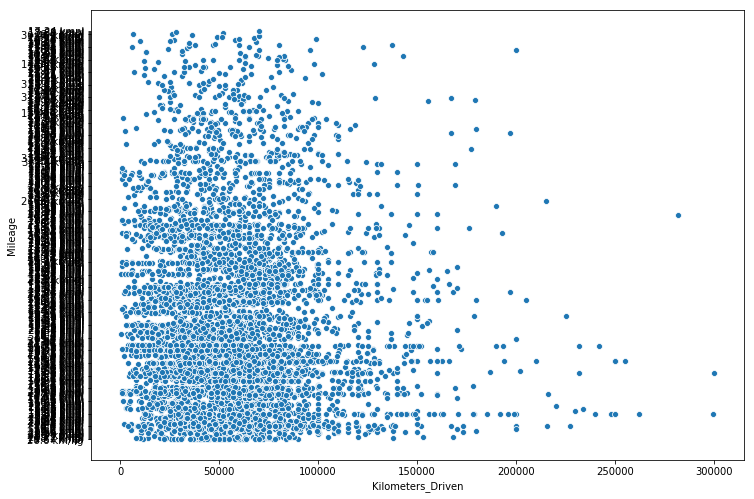

In [254]:
sb.scatterplot(data['Kilometers_Driven'],data['Mileage'])

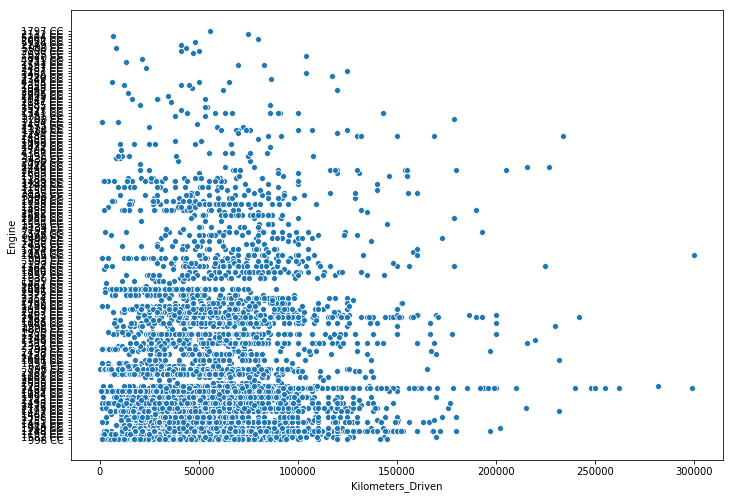

In [386]:
sb.scatterplot(data['Kilometers_Driven'],data['Engine'])

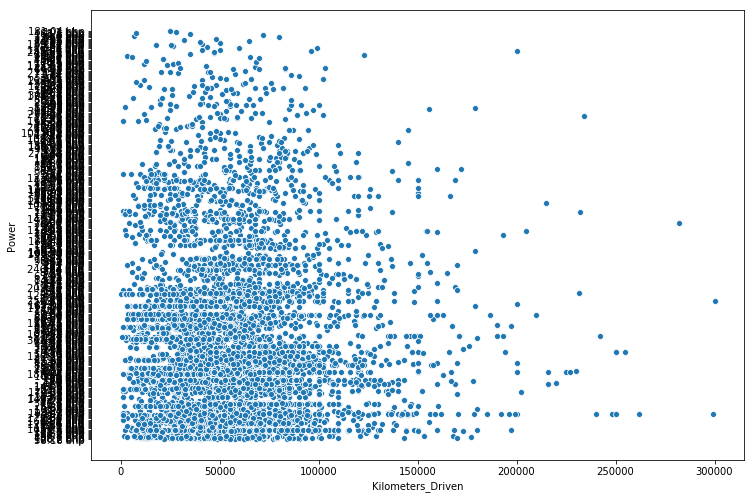

In [257]:
sb.scatterplot(data['Kilometers_Driven'],data['Power'])

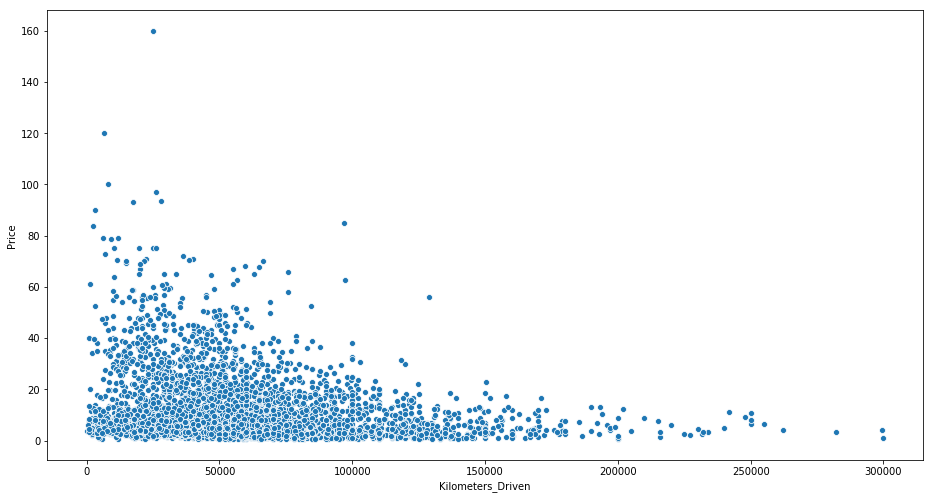

In [387]:
rcParams['figure.figsize'] = 15.7,8.27
sb.scatterplot(data['Kilometers_Driven'],data['Price'])

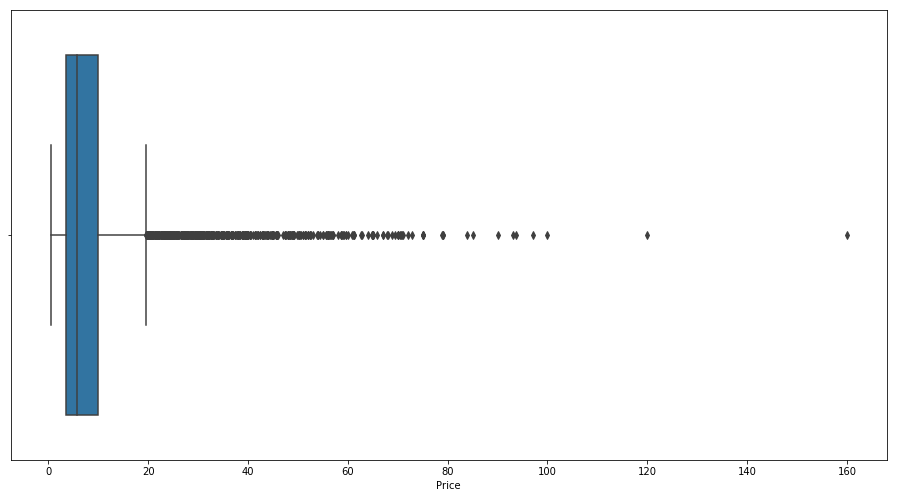

In [388]:
sb.boxplot(data['Price'])

In [389]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=8
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [390]:
### We got the outlier 
outlier_datapoints = detect_outlier(data['Price'])
print(outlier_datapoints)

[160.0, 120.0, 100.0]


In [391]:
data[data['Price'] == 160.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33 kmpl,2993 CC,255 bhp,5.0,160.0


In [392]:
data[data['Price'] == 120.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4 kmpl,5204 CC,560 bhp,2.0,120.0


In [393]:
data[data['Price'] == 100.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.5 kmpl,5000 CC,488.1 bhp,2.0,100.0


In [394]:
data.drop(4079,inplace=True)
data.drop(5781,inplace=True)

In [395]:
data.drop(5919,inplace=True)

In [396]:
data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50


In [397]:
data.replace("km/kg",'',inplace=True)

In [398]:
data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50


In [405]:
data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50


In [416]:
data['Engine']=data["Engine"].str.split(" ", n = 1, expand = True)

In [418]:
data.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.8 bhp,5.0,17.74


import re
str = "The rain in Spain"
x = re.sub("\s", "9", str)
print(x)

In [420]:
data['Mileage']=data["Mileage"].str.split(" ", n = 1, expand = True)

In [422]:
data['Power']=data["Power"].str.split(" ", n = 1, expand = True)

### Cleaned the Data for the features Mileage, Engine , Power

In [423]:
data.head(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00


In [428]:
data['Location'].value_counts()

Mumbai        784
Hyderabad     739
Kochi         648
Coimbatore    634
Pune          613
Delhi         548
Kolkata       528
Chennai       486
Jaipur        410
Bangalore     352
Ahmedabad     223
Name: Location, dtype: int64

###### Feature ==== Location 
-- Mumbai 1
-- Hyderabad 2
-- Kochi 3
-- Coimbatore 4
-- Pune 5
-- Delhi 6
-- Kolkatta 7
-- Kolkata 7
-- Chennai 8
-- Jaipur 9
-- Bangalore 10
-- Ahmedabad 11


In [433]:
##data['Location'].replace('Mumbai',1)
data['Location'].replace('Hyderabad',2,inplace=True)
data['Location'].replace('Kochi',3,inplace=True)
data['Location'].replace('Coimbatore',4,inplace=True)
data['Location'].replace('Pune',5,inplace=True)
data['Location'].replace('Delhi',6,inplace=True)
data['Location'].replace('Kolkatta',7,inplace=True)
data['Location'].replace('Kolkata',7,inplace=True)
data['Location'].replace('Chennai',8,inplace=True)
data['Location'].replace('Jaipur',9,inplace=True)
data['Location'].replace('Bangalore',10,inplace=True)
data['Location'].replace('Ahmedabad',11,inplace=True)


In [462]:
data['Location'].replace('Kolkata',7,inplace=True)

In [434]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,1,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,5,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,8,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,8,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,4,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [436]:
data['Fuel_Type'].value_counts()

Diesel    3190
Petrol    2709
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

In [437]:
#### Lable Encoding for Fuel Types
data['Fuel_Type'].replace('Diesel',1,inplace=True)
data['Fuel_Type'].replace('Petrol',2,inplace=True)
data['Fuel_Type'].replace('CNG',3,inplace=True)
data['Fuel_Type'].replace('LPG',4,inplace=True)

In [438]:
data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,1,2010,72000,3,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,5,2015,41000,1,Manual,First,19.67,1582,126.2,5.0,12.50


In [439]:
data['Transmission'].value_counts()

Manual       4262
Automatic    1703
Name: Transmission, dtype: int64

In [440]:
#### Lable Encoding for Fuel Types
data['Transmission'].replace('Manual',1,inplace=True)
data['Transmission'].replace('Automatic',2,inplace=True)

In [441]:
data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,1,2010,72000,3,1,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,5,2015,41000,1,1,First,19.67,1582,126.2,5.0,12.50


In [442]:
data['Owner_Type'].value_counts()

First             4894
Second             953
Third              110
Fourth & Above       8
Name: Owner_Type, dtype: int64

In [443]:
#### Lable Encoding for Fuel Types
data['Owner_Type'].replace('First',1,inplace=True)
data['Owner_Type'].replace('Second',2,inplace=True)
data['Owner_Type'].replace('Third',3,inplace=True)
data['Owner_Type'].replace('Fourth & Above',4,inplace=True)

In [444]:
data.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,1,2010,72000,3,1,1,26.6,998,58.16,5.0,1.75


In [445]:
data['Name'].value_counts()

Mahindra XUV500 W8 2WD                              49
Maruti Swift VDI                                    45
Honda City 1.5 S MT                                 34
Maruti Swift Dzire VDI                              34
Maruti Swift VDI BSIV                               31
Hyundai i10 Sportz                                  30
Maruti Ritz VDi                                     30
Toyota Fortuner 3.0 Diesel                          29
Hyundai Grand i10 Sportz                            27
Honda Amaze S i-Dtech                               27
Maruti Ertiga VDI                                   25
Honda Brio S MT                                     25
Honda City 1.5 V MT                                 24
Hyundai Verna 1.6 SX                                23
Maruti Wagon R VXI                                  23
Maruti Wagon R LXI                                  22
Maruti Alto LXi                                     21
BMW 3 Series 320d                                   20
Maruti Alt

In [446]:
data.corr()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price
Year,1.000000,-0.501611,-0.115996,0.095247,-0.394226,0.012305,0.312709
Kilometers_Driven,-0.501611,1.000000,-0.240333,-0.122411,0.252473,0.240631,-0.183645
Fuel_Type,-0.115996,-0.240333,1.000000,-0.145603,0.041295,-0.299204,-0.325872
Transmission,0.095247,-0.122411,-0.145603,1.000000,-0.009618,-0.073270,0.595708
Owner_Type,-0.394226,0.252473,0.041295,-0.009618,1.000000,0.016260,-0.105212
Seats,0.012305,0.240631,-0.299204,-0.073270,0.016260,1.000000,0.067716
Price,0.312709,-0.183645,-0.325872,0.595708,-0.105212,0.067716,1.000000


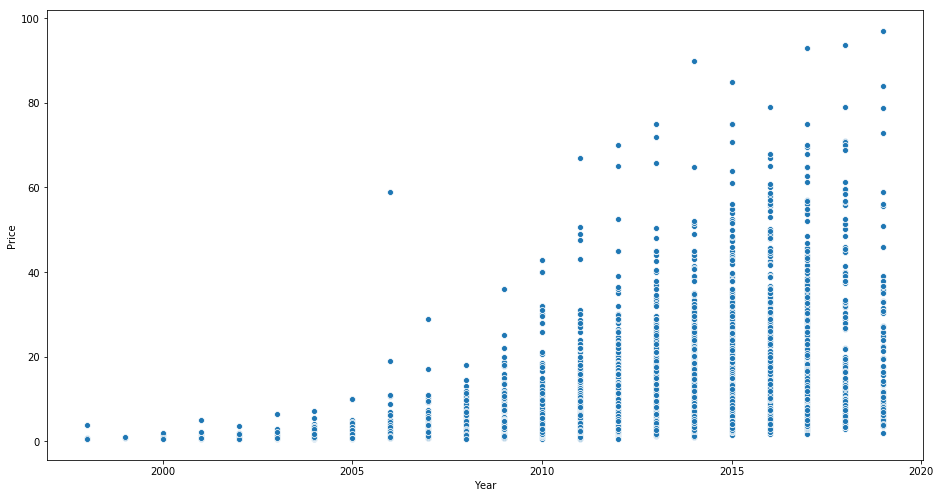

In [452]:
sb.scatterplot(data['Year'],data['Price'])

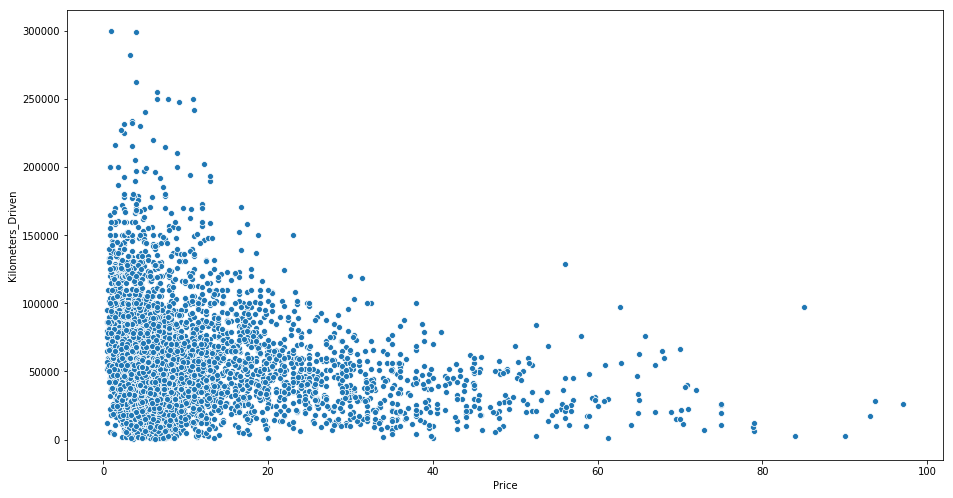

In [454]:
sb.scatterplot(data['Price'],data['Kilometers_Driven'])

C:\Users\sgudda\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


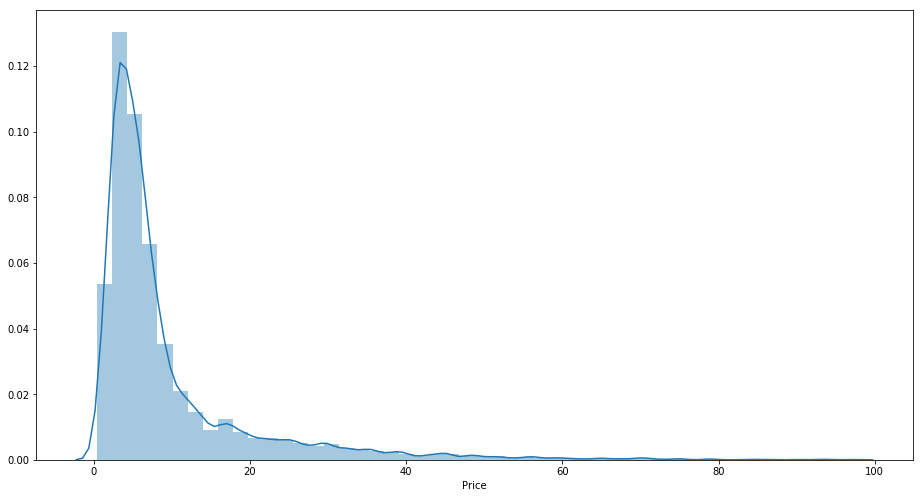

In [483]:
sb.distplot(data['Price'])

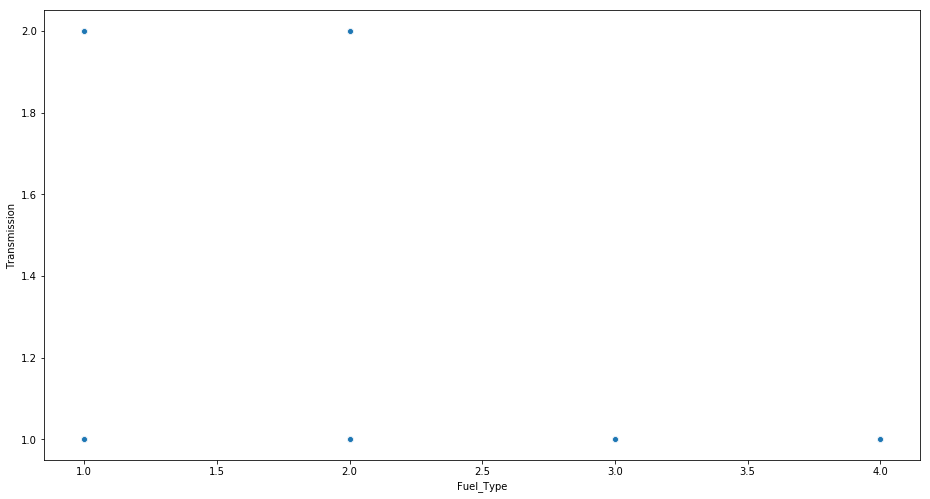

In [455]:
sb.scatterplot(data['Fuel_Type'],data['Transmission'])

In [457]:
data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,1,2010,72000,3,1,1,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,5,2015,41000,1,1,1,19.67,1582,126.2,5.0,12.50


In [465]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5965 entries, 0 to 6018
Data columns (total 12 columns):
Name                 5965 non-null object
Location             5965 non-null int64
Year                 5965 non-null int64
Kilometers_Driven    5965 non-null int64
Fuel_Type            5965 non-null int64
Transmission         5965 non-null int64
Owner_Type           5965 non-null int64
Mileage              5965 non-null object
Engine               5965 non-null object
Power                5965 non-null object
Seats                5965 non-null float64
Price                5965 non-null float64
dtypes: float64(2), int64(6), object(4)
memory usage: 605.8+ KB


In [466]:
data.Mileage = data.Mileage.astype('float64') 

In [475]:
##data.Engine = data.Engine.astype('float64') 
##data.Power = data.Power.astype('float64') 
data['Power'].isnull().sum()

0

In [477]:
## Importing the Random forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
X = data[['Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Seats']]
y = data.Price




## Training the Model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
model = RandomForestClassifier()
model.fit(X,y)

In [ ]:
## Predicting  Classifier
y_predict = model.predict(X_test)
## Verifying the Accuracy of the model
from sklearn.metrics import accuracy_score
print(100*accuracy_score(y_test,y_predict))
print("\n Cross Matrix ")
print("=================")
pd.crosstab(y_test,y_predict)

In [484]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5965 entries, 0 to 6018
Data columns (total 12 columns):
Name                 5965 non-null object
Location             5965 non-null int64
Year                 5965 non-null int64
Kilometers_Driven    5965 non-null int64
Fuel_Type            5965 non-null int64
Transmission         5965 non-null int64
Owner_Type           5965 non-null int64
Mileage              5965 non-null float64
Engine               5965 non-null float64
Power                5965 non-null object
Seats                5965 non-null float64
Price                5965 non-null float64
dtypes: float64(4), int64(6), object(2)
memory usage: 605.8+ KB


In [485]:
X = data[['Location', 'Year', 'Kilometers_Driven','Fuel_Type', 'Transmission','Owner_Type','Mileage','Engine','Seats']]
y = data['Price']

In [486]:
from sklearn.model_selection import train_test_split

In [487]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [488]:
from sklearn.linear_model import LinearRegression

In [489]:
lm = LinearRegression()

In [490]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [491]:
# print the intercept
print(lm.intercept_)

-1864.1795324596333


In [498]:
# print the coefficients
print(lm.intercept_)
print(lm.coef_)

-1864.1795324596333
[ 2.67287695e-02  9.28731848e-01 -3.39159237e-05 -2.24678567e+00
  5.67062367e+00  1.49805797e-01 -1.62476643e-01  1.01131751e-02
 -2.27515498e+00]


In [492]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Location,0.026729
Year,0.928732
Kilometers_Driven,-0.000034
Fuel_Type,-2.246786
Transmission,5.670624
Owner_Type,0.149806
Mileage,-0.162477
Engine,0.010113
Seats,-2.275155


In [493]:
predictions = lm.predict(X_test)

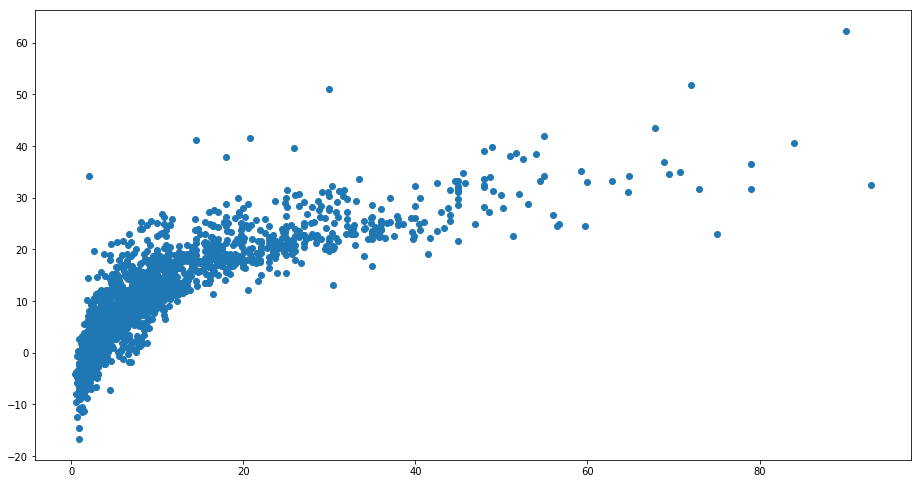

In [494]:
plt.scatter(y_test,predictions)

C:\Users\sgudda\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


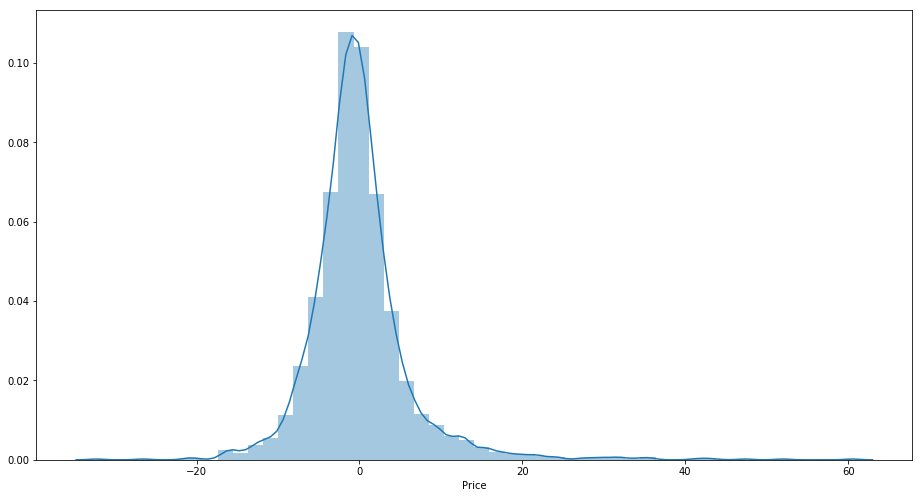

In [495]:
sb.distplot((y_test-predictions),bins=50);

In [496]:
from sklearn import metrics

In [497]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.027686140318833
MSE: 39.71358209361747
RMSE: 6.301871316808799


from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

In [529]:
X = data[['Location', 'Year', 'Fuel_Type', 'Transmission','Owner_Type','Seats']]
y = data['Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression

In [530]:
lm1=LinearRegression()
lm1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [531]:
# print the intercept
print(lm.intercept_)

-1864.1795324596333


In [532]:
# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)


-1548.9226454554237
[-0.02664696  0.76679494 -4.34818421 13.27317722  0.2878369   0.69035352]


In [533]:
coeff_df = pd.DataFrame(lm1.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Location,-0.026647
Year,0.766795
Fuel_Type,-4.348184
Transmission,13.273177
Owner_Type,0.287837
Seats,0.690354


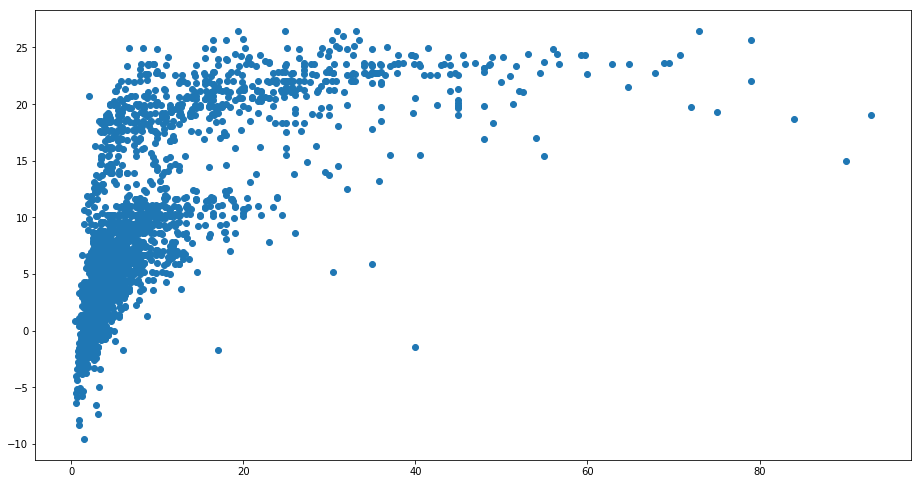

In [534]:
predictions = lm1.predict(X_test)
plt.scatter(y_test,predictions)

In [535]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.805601932771097
MSE: 64.54842107353429
RMSE: 8.034203200911357


In [536]:
testing = pd.read_excel('Data_Test.xlsx')

In [537]:
testing.head(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN


In [538]:
data.shape

(5965, 12)

In [539]:
testing.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [541]:
testing[['Engine']]

KeyError: False

C:\Users\sgudda\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


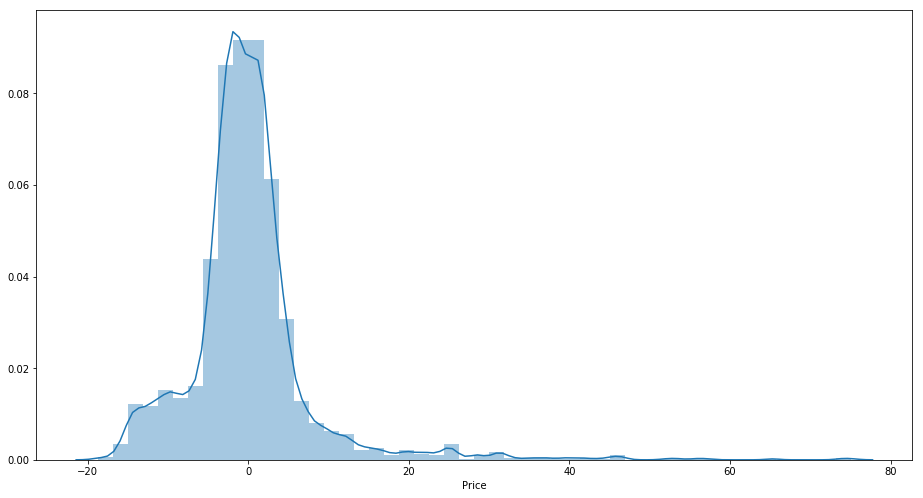

In [542]:
sb.distplot((y_test-predictions),bins=50);